# SSD: Single Shot MultiBox Detector

This is designed to visualize priors (*a.k.a* anchors).

### 1. Setup
* First, set up Python, numpy and matplotlib

In [20]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (12, 12)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

* Load caffe

In [2]:
# The caffe module needs to be on the Python path;
#  we'll add it here explicitly.
import sys
caffe_root = '../../'  # this file should be run from {caffe_root}/examples (otherwise change this line)
sys.path.insert(0, caffe_root + 'python')

import caffe
# If you get "No module named _caffe", either you have not built pycaffe or you have the wrong path.

### 2. Load net and set up input preprocessing
* Set caffe to CPU/GPU mode and load the net from disk

In [4]:
caffe.set_device(0)
caffe.set_mode_cpu()

model_def = '/home/kwang/det-crf/Inter-scale/SSD_300x300_top_down_init_0.0/test.prototxt'
model_weights = '/home/kwang/det-crf/Inter-scale/SSD_300x300_top_down_init_0.0/models/VGG_VOC0712_SSD_300x300_iter_40000.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

In [5]:
### perform detection
output = net.forward()

In [9]:
# for each layer, show the output shape
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(8, 3, 300, 300)
label	(1, 1, 24, 8)
data_data_0_split_0	(8, 3, 300, 300)
data_data_0_split_1	(8, 3, 300, 300)
data_data_0_split_2	(8, 3, 300, 300)
data_data_0_split_3	(8, 3, 300, 300)
data_data_0_split_4	(8, 3, 300, 300)
data_data_0_split_5	(8, 3, 300, 300)
data_data_0_split_6	(8, 3, 300, 300)
conv1_1	(8, 64, 300, 300)
conv1_2	(8, 64, 300, 300)
pool1	(8, 64, 150, 150)
conv2_1	(8, 128, 150, 150)
conv2_2	(8, 128, 150, 150)
pool2	(8, 128, 75, 75)
conv3_1	(8, 256, 75, 75)
conv3_2	(8, 256, 75, 75)
conv3_3	(8, 256, 75, 75)
pool3	(8, 256, 38, 38)
conv4_1	(8, 512, 38, 38)
conv4_2	(8, 512, 38, 38)
conv4_3	(8, 512, 38, 38)
conv4_3_relu4_3_0_split_0	(8, 512, 38, 38)
conv4_3_relu4_3_0_split_1	(8, 512, 38, 38)
pool4	(8, 512, 19, 19)
conv5_1	(8, 512, 19, 19)
conv5_2	(8, 512, 19, 19)
conv5_3	(8, 512, 19, 19)
pool5	(8, 512, 19, 19)
fc6	(8, 1024, 19, 19)
fc7	(8, 1024, 19, 19)
fc7_relu7_0_split_0	(8, 1024, 19, 19)
fc7_relu7_0_split_1	(8, 1024, 19, 19)
fc7_relu7_0_split_2	(8, 1024, 19, 19)
fc7_relu

In [10]:
item_id = 1

In [21]:
conv4_3 = net.blobs['conv4_3_norm_mbox_priorbox'].data
fc7     = net.blobs['fc7_mbox_priorbox'].data
conv6_2 = net.blobs['conv6_2_mbox_priorbox'].data
conv7_2 = net.blobs['conv7_2_mbox_priorbox'].data
conv8_2 = net.blobs['conv8_2_mbox_priorbox'].data
conv9_2 = net.blobs['conv9_2_mbox_priorbox'].data

In [22]:
print 'conv4_3.shape={}, #priors={}'.format(conv4_3.shape, conv4_3.shape[2]/4)
print 'fc7.shape={}, #priors={}'.format(fc7.shape, fc7.shape[2]/4)
print 'conv6_2.shape={}, #priors={}'.format(conv6_2.shape, conv6_2.shape[2]/4)
print 'conv7_2.shape={}, #priors={}'.format(conv7_2.shape, conv7_2.shape[2]/4)
print 'conv8_2.shape={}, #priors={}'.format(conv8_2.shape, conv8_2.shape[2]/4)
print 'conv9_2.shape={}, #priors={}'.format(conv9_2.shape, conv9_2.shape[2]/4)

conv4_3.shape=(1, 2, 23104), #priors=5776
fc7.shape=(1, 2, 8664), #priors=2166
conv6_2.shape=(1, 2, 2400), #priors=600
conv7_2.shape=(1, 2, 600), #priors=150
conv8_2.shape=(1, 2, 144), #priors=36
conv9_2.shape=(1, 2, 16), #priors=4


(1, 2, 144)


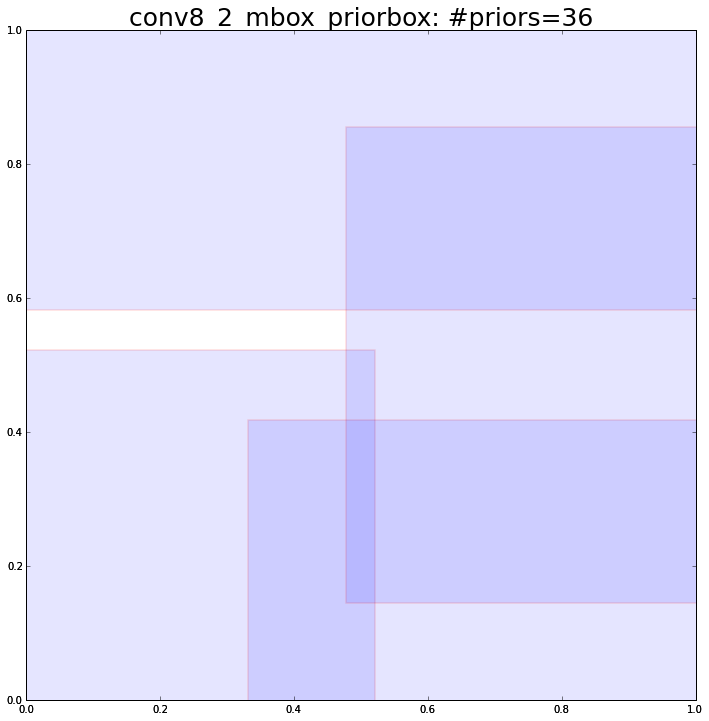

In [93]:
blob_name = 'conv8_2_mbox_priorbox'
prior_blob = net.blobs[blob_name].data
print prior_blob.shape
num_priors = prior_blob.shape[2]/4
step_size = 10

fig2 = plt.figure()
plt.title('{}: #priors={}'.format(blob_name, num_priors), fontsize=25)
ax2 = fig2.add_subplot(111, aspect='equal')

for i in xrange(0, num_priors, step_size):
    [xmin, ymin, xmax, ymax] = prior_blob[0, 0, i*4:i*4+4]
    x = xmin
    y = ymin
    h = ymax - ymin
    w = xmax - xmin
    # print '#{}: xmin={:.3f}, ymin={:.3f}, xmax={:.3f}, ymax={:.3f}'.format(i+1, xmin, ymin, xmax, ymax)
    ax2.add_patch(
        patches.Rectangle(
            (x, y),
            w,
            h,
            fill=True,      # remove background
            alpha=0.1,
            edgecolor="red",
            linewidth=2
        )
    )